# Caclulo de propiedades de los muones

In [1]:
# Librerías
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

import scipy.optimize as op
import scipy.stats
from scipy.optimize import curve_fit

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import math

#from MuonTomographyFunctions import *

# Atenuación del flujo de muones por roca
* Ecuación 17, figura 2.
  * REF [1]:[*Lesparre, N., Gibert, D., Marteau, J., Déclais, Y., Carbone, D., & Galichet, E. (2010). Geophysical muon imaging: feasibility and limits. Geophysical Journal International, 183(3), 1348-1361. (Figure 2)*]
  * $\frac{dE}{d\rho} = -10 ^{I_{4}y^{4}+I_{3}y^{4}+I_{2}y^{2}+I_{1}y+I_{0}}$.
  * Con $y = Log_{10} (E)$.  $E \rightarrow $ [GeV]. $\frac{dE}{d\rho} \rightarrow $ $[\frac{MeV \cdot cm^{2}}{g}]$

    * $I_{4} = 0.0154$.
    * $I_{3} = -0.0461$.
    * $I_{2} = 0.0368$.
    * $I_{1} = 0.0801$.
    * $I_{0} = 0.2549$
  * $\frac{dE}{d\rho} \rightarrow $ como el "stop power". 


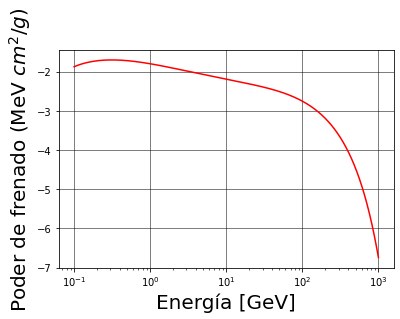

In [24]:
I0,I1,I2,I3,I4 = 0.2549,0.0801,0.0368,-0.0461,0.0154
Energies = np.logspace(-1,3,1000) # espacio np, tipo log de -1 a 3, 100 pasos
y = np.log10(Energies)           # Energía mu, del log10
dE_dρ = -10**(I4*(y**4)+I3*(y**3)+I2*(y**2)+I1*y+I0)

# gráfica
plt.plot(Energies,dE_dρ,color='red')
plt.xscale('log') 
plt.xlabel('Energía [GeV]',fontsize=20)
plt.ylabel('Poder de frenado (MeV $cm^2/g$)',fontsize=20)
plt.yticks(np.arange(-7, -1, step=1))  # Set label locations.
plt.grid(color = 'black', linestyle = '-', linewidth = 0.5)
plt.show()


### Energía mínima de poder de frenado para roca estándar.
* Ecuación 18, figura 3. [1].
* $$E_{min} - \int_{0}^{\rho} \frac{dE}{d\rho}d\rho = E_{mu}$$
* Despejando $E_{min}$
*  $$ E_{mu} = E_{min} +  \int_{0}^{\rho} \frac{dE}{d\rho}d\rho $$

so rest energy of a muon minus the energy lost as a function of initial energy and path length is the minimum energy required to cross that opacity??


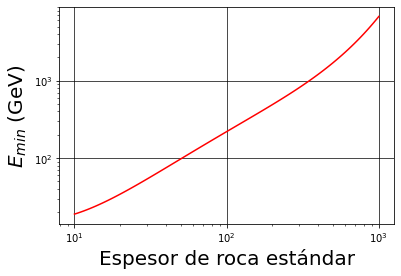

In [21]:
opacity = np.logspace(1,3,100)  # np espacio, de opacidad (ρ)
E_mu = .10566
energies = np.logspace(-1,3,100) # np espacio, de energías
y = np.log10(energies)
stop_power = 10**(I4*(y**4)+I3*(y**3)+I2*(y**2)+I1*y+I0)
Emin = E_mu + stop_power*opacity
plt.xscale('log')
plt.yscale('log')
plt.plot(opacity,Emin,color='red')
plt.ylabel('$E_{min}$ (GeV)',fontsize=20)
plt.xlabel('Espesor de roca estándar',fontsize=20)
plt.grid(color = 'black', linestyle = '-', linewidth = 0.7)


print('so rest energy of a muon minus the energy lost as a function of initial energy and path length is the minimum energy required to cross that opacity??')

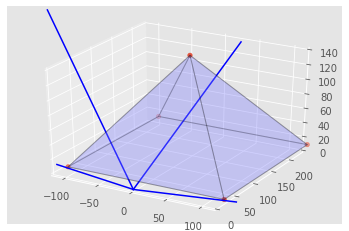

The entire pyramid is technically within the maximum angular ranges if
the detectors are located at the center and 25 m away
The stats of zenith angles (likelihood) is unknown,
so the probability of muons travelling those maximum angles is unknown.


In [50]:
# GEometric Dimensions
# dimensions of detectors: length 4.8 m, height 2.4m, depth 2m
# dimensions of 2x2 stack: length 19.2m, height 4.8m, depth 2m
# Pyramid and angle ranges 
fig = pl.figure()
ax = pl.axes(projection='3d')

#pyramid vertices
v = np.array([[-115.165,27,0],[115.165,27,0],[115.165,257.33,0],[-115.165,257.33,0],[0,142.165,138.7]])
ax.scatter3D(v[:, 0], v[:, 1], v[:, 2])

#pyramid planes
verts = [ [v[0],v[1],v[4]], [v[0],v[3],v[4]],
 [v[2],v[1],v[4]], [v[2],v[3],v[4]], [v[0],v[1],v[2],v[3]]]

#plot 2d planes connecting vertices
collection = Poly3DCollection(verts, linewidths=1, alpha=0.2)
face_color = [0.5, 0.5, 1] # alternative: matplotlib.colors.rgb2hex([0.5, 0.5, 1])
collection.set_facecolor(face_color)
ax.add_collection3d(collection)
collection.set_edgecolor('k')


#plotting angular ranges
x = np.linspace(0,27)
az1 = x/np.cos(78.23*np.pi/180) #84.05 is max theta
az2 = -x/np.cos(78.23*np.pi/180)

pol1 = az1/np.sin(39.81*np.pi/180) #22.62 is max theta 
pol2 = -az2/np.sin(39.81*np.pi/180) #22.62 is max theta 

ax.plot(az1, x, zs=0, zdir='z',color = 'b')
ax.plot(az2, x, zs=0, zdir='z',color= 'b')
ax.plot(az1, x, pol1, zdir='z',color = 'b')
ax.plot(az2, x, pol2, zdir='z',color= 'b')

pl.ylim(0,230)
pl.xlim(-115,115)
ax.set_zlim(0,140)
#pl.savefig('/Users/Mira/Desktop/DetectorRange')
pl.show()


print('The entire pyramid is technically within the maximum angular ranges if\nthe detectors are located at the center and 25 m away')
print('The stats of zenith angles (likelihood) is unknown,\nso the probability of muons travelling those maximum angles is unknown.')



In [53]:
#global functions
#  plotting average angles as unit vectors along the z direction (rather than along the y direction)
def unit(x,y,z):
    M = np.sqrt(x**2 + y**2 + z**2)
    #M=1
    return x/M, z/M,y/M #flipping y and z to project vertically

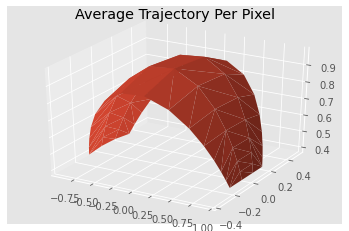

In [55]:
# 3. Average direction per pixel.
# Doing this for ONE shipping container.
#building the 480 by 120 detector, with pixels of 2cm by 2cm, two detectors 200 cm apart. 

#i: pixels along x axis (horizontal)
#j: pixels along z axis (vertical)
#y: direction facing pyramid.

i = np.arange(1,960,16) #32 should be 2, this is for general visuals to minimize computing time
j = np.arange(1,240,16)

DX = np.zeros((961,241))#average direction of incident ray to hit a pixel on the second detector (after passing through first) 
DZ = np.zeros((961,241))
for Hpix in i: #for all 480 pixels along the x axis
    for Vpix in j: #for all 120 pixels along the y axis
        dx = 0. #average distance travelled in x to the first detector pixel x,y
        dz = 0. #average distance travelled in y to the first detector pixel x,y
        dy = 200.0 #distance to second detector
        for H in i: #for every pixel on the second detector x axis
            for V in j:#for every pixel on the second detector y axis
                #H,V is pixels on second detector
                #comparing to the H,V pixel on the second detector (the one it passes through first)
                dx = dx+(H-Hpix) #horizontal distance of pixel x,y to H,V (along x axis)
                dz = dz+(V-Vpix) #vertical distance of pixel x,y to H,V (along z axis)
        dx = np.sum(dx)/(len(i)*len(j))#(960*480) #AVERAGE
        dz = np.sum(dz)/(len(i)*len(j))#(960*480) #AVERAGE
        DX[Hpix,Vpix]=dx
        DZ[Hpix,Vpix]=dz
i = np.arange(1,960,64) #480 horizontally
j = np.arange(1,240,64) #120 vertically


Xvals = []
Yvals = []
Zvals = []
for H in i:
    for V in j:
        if DX[H][V] !=0 and DZ[H][V] !=0:
            x,y,z = unit(DX[H][V],200,DZ[H][V])
            Xvals.append(x)
            Yvals.append(y)
            Zvals.append(z)
        #print(x)
        #ax.scatter(x,y,z)

        
fig = pl.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(Xvals,Yvals,Zvals)
ax.set_title('Average Trajectory Per Pixel')
pl.show()



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math as mth

# Flujo de Muones 
REF: rpp2020-rev-cosmic-rays, 30.3.1 Muons, Eq.(30.4), válido para $E_{\mu} > 100 GeV$, ángulo del cenit $\theta$ > 70.
* Formula de Gaisser o Parametrización de Gaisser

In [ ]:
def GaisserFlux(muonEnergy, theta):
    Emu   = muonEnergy
    costh = mth.cos(theta)
    pion = 1./(1 + 1.1 * Emu * costh / 115);
    kaon = 0.054/(1 + 1.1 * Emu * costh/850);
    flux  = 0.14 * (pion + kaon);
    return flux 

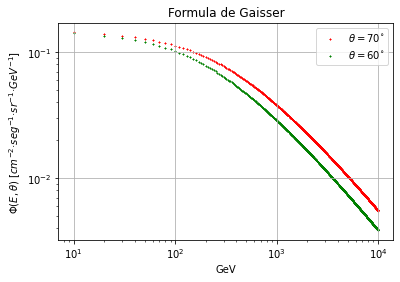

In [ ]:
# datos del gráfico
x = np.linspace(1e1,1e4,1000)# energía {1e1,1e4}
th1 = 70*mth.pi/180          # grados -> rads, θ = 70°
th2 = 60*mth.pi/180          # grados -> rads, θ = 00°
flx1 = GaisserFlux(x,th1)    # flujo θ = 70°
flx2 = GaisserFlux(x,th2)    # flujo θ = 60°

fig, ax = plt.subplots()     # init fig.
ax.scatter(x,flx1,s=1,marker='x',color='r') # gráfica
ax.scatter(x,flx2,s=1,marker='x',color='g') # gráfica
ax.loglog()                         # xy loglog
#ax.set_ylim(y.min(),y.max())        # límites y
ax.set_title('Formula de Gaisser')  # título
ax.set_xlabel('GeV')                # eje x
ax.set_ylabel(r"$\Phi(E,\theta) \ [cm^{-2}·seg^{-1}·sr^{-1}·GeV^{-1}]$ ") # eje y
plt.grid()                          # rejilla
plt.legend([r"$\theta=70^{\circ}$",
            r"$\theta=60^{\circ}$"])# θ=70°,60°
plt.show()


# Flujo Muones 2
REF: arXiv:1509.06176v1, -> Eq.(3) y REF: https://doi.org/10.3389/fenrg.2021.750159 
* Parametrización modificada Gaisser, del flujo de muones al nivel del mar.
* Válido para flujo con E de 0.5 a 6000 GeV y para ángulos pequeños

In [11]:
def GaisserMod(muonEnergy, theta):
    p1 = 0.102573
    p2 = -0.068287
    p3 = 0.958633
    p4 = 0.0407253
    p5 = 0.817285
    
    costh = mth.cos(theta)
    costhStar2 = (costh**2 + p1**2 + p2*pow(costh,p3) + p4*pow(costh,p5))/(1+(p1**2)+p2+p4)
    costhStar  = mth.sqrt(costhStar2)
    Emu = muonEnergy # E -> GeV
    pion = 1/(1+1.1*Emu*costhStar/115)
    kaon = 0.054/(1+1.1*Emu*costhStar/850)
    flux = 0.14*pow(Emu*(1+3.64/(Emu*pow(costhStar,1.29))),-2.7)*(pion+kaon)
    
    return flux 

In [12]:
# datos del gráfico
Em = np.linspace(1,6e3,1000)# energía {1e1,1e4}
th1 = 0*mth.pi/180      # grados -> rads, θ = 0°
th2 = 75*mth.pi/180      # grados -> rads, θ = 75°
flx1 = GaisserMod(Em,th1) # flujo θ = 0°
flx2 = GaisserMod(Em,th2) # flujo θ = 75°

fig, ax = plt.subplots() # init fig.
ax.scatter(Em,flx1,s=1,marker='x',color='r') # gráfica
ax.scatter(Em,flx2,s=1,marker='x',color='g') # gráfica
ax.loglog()                         # xy loglog
ax.set_xlim(1,1e4)                  # límites c
ax.set_ylim(flx1.min(),flx1.max())  # límites y
ax.set_title('Fórmula modficiada de Gaisser')  # título
ax.set_xlabel('GeV')                # eje x
ax.set_ylabel(r"$\Phi(E,\theta)\ [cm^{-2}·seg^{-1}·sr^{-1}·GeV^{-1}]$ ") # eje y
plt.grid()                          # rejilla
plt.legend([r"$\theta=0^{\circ}$",
            r"$\theta=75^{\circ}$"])# θ=0°,75°
plt.show()


NameError: ignored